# MGC Demo
In this notebook, we show how to use the MGC independence test class on simulated data.

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
import matplotlib.ticker as ticker
#import seaborn as sns; sns.set()
#import pandas as pd
from mgcpy.independence_tests.mgc import MGC
from mgcpy.benchmarks import simulations as sims

**Function to compute and print MGC output values, given X and Y:**

In [76]:
def compute_mgc(X, Y):
    mgc = MGC()
    mgc_statistic, independence_test_metadata = mgc.test_statistic(X, Y)
    p_value, metadata = mgc.p_value(X, Y)

    print("MGC test statistic:", mgc_statistic)
    print("P Value:", p_value)
    #print("Optimal Scale:", independence_test_metadata["optimal_scale"])
    return mgc_statistic, p_value, independence_test_metadata

**Function to compute and plot the simulated data and the MGC corresponding local correlation maps with optimal scale:**

In [91]:
def mgc_plot(X, Y, simulation_name, only_viz=False, only_mgc=False):
    #plt.clf()

    if not only_mgc:
        # simulation
        fig = plt.figure(figsize=(8,8))
        plt.title(simulation_name + " Simulation", fontsize=17)
        plt.scatter(X[:,0], Y[:,0])
        plt.xlabel('X', fontsize=15)
        plt.ylabel('Y', fontsize=15) 
        plt.axis('equal')
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.show()

    if not only_viz:
        # run MGC
        mgc_statistic, p_value, independence_test_metadata = compute_mgc(X, Y)

        # local correlation map
        fig = plt.figure(figsize=(8,8))
        local_corr = independence_test_metadata["local_correlation_matrix"]

        # define two rows for subplots
        ax = plt.gca()

        # draw heatmap
        plt.title("Local Correlation Map", fontsize=17)
        im = ax.imshow(local_corr, cmap='YlGnBu')

        # colorbar
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel("", rotation=-90, va="bottom")
        #fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
        ax.invert_yaxis()
                
        # Turn spines off and create white grid.
        for edge, spine in ax.spines.items():
            spine.set_visible(False)

        # optimal scale
        optimal_scale = independence_test_metadata["optimal_scale"]
        ax.scatter(optimal_scale[0], optimal_scale[1], marker='X', s=200, color='red') 

        # other formatting
        ax.tick_params(bottom="off", left="off")
        ax.set_xlabel('#Neighbors for X', fontsize=15)
        ax.set_ylabel('#Neighbors for Y', fontsize=15)
        ax.set_xlim(0, 60)
        ax.set_ylim(0, 60)
        
        plt.show()

# Simulated Linear Data
First, we use a simulated example of Linear data, where `Y = XB + N` that is, `Y` is linearly dependent on `X` with added gaussian noise.

**First let's visualize the data, which clearly shows a slightly linear relationship:**

[[-0.69198779  0.18236784 -0.55349325 -0.29817661 -0.18634447 -0.87385644
  -0.01675855  0.54961639  0.94876906  0.84360142 -0.31630326  0.26506057
  -0.46969755  0.17495724  0.55487294  0.7197614   0.6877137  -0.71202396
  -0.8485548  -0.15804884  0.35631348  0.69911379  0.62262905 -0.35320649
  -0.22129935 -0.40791716 -0.794978   -0.69907243 -0.05848131 -0.51222227
   0.44514037 -0.23736801  0.46391126 -0.49347417  0.38685186  0.37943616
  -0.60447922 -0.38036988 -0.53064025  0.53489706  0.5080103   0.56439519
   0.0677455  -0.49572507  0.37072501 -0.29463516 -0.70315084 -0.67595525
   0.70258537 -0.58428249  0.14102167 -0.8983592  -0.78810629 -0.38004984
  -0.23656869  0.65481118 -0.30425405  0.11929743 -0.49289453 -0.67434041]]

[[-0.6908471   0.16075167 -0.67384637 -0.34711818 -0.26276349 -0.9370918
  -0.06475708  0.54963171  0.92910889  0.66925604 -0.42844048  0.27750248
  -0.38895249  0.24754639  0.69432075  0.8844475   0.67773753 -0.72245891
  -0.90505028 -0.15128523  0.6783898

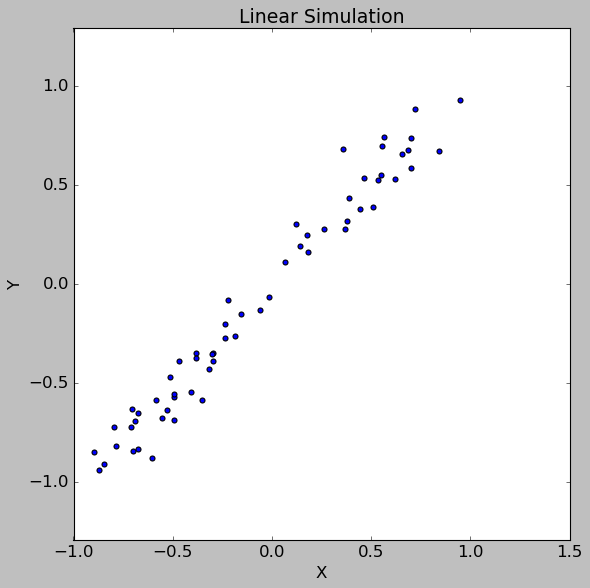

In [92]:
X, Y = sims.linear_sim(num_samp=60, num_dim=1, noise=0.1)
print(X.reshape(1, -1))
print()
print(Y.reshape(1, -1))
mgc_plot(X, Y, "Linear", only_viz=True)

**Then let us compute MGC stats for this linear data and plot the local correlation maps:**

MGC test statistic: 0.9692879620548563
P Value: 0.0


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


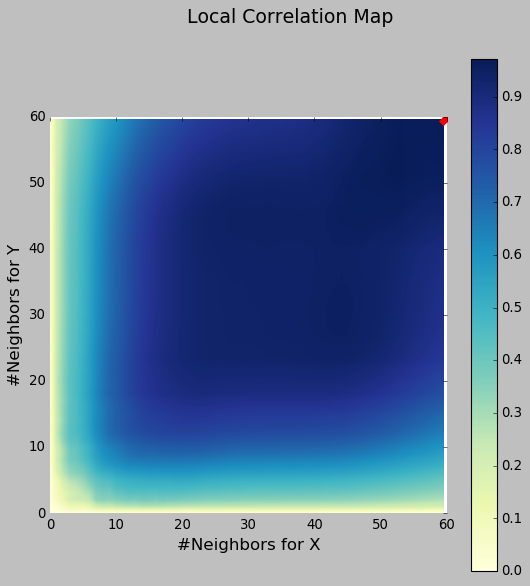

In [90]:
mgc_plot(X, Y, "Linear", only_mgc=True)

As we can see, the local correlation map plot **suggests a strongly linear relationship**. This is because intuitively, having more and more neighbors will help in our identification of the linear relationship between x and y, and as we can see in the local correlation map, **the optimal scale \[60, 60\] is the global scale marked by the red spot on the map**.

# Simulated Non-Linear Data
### Spiral Simulation
Now, we use a simulated example of 60 samples of Spiral data with added gaussian noise of 0.1.

**First let's visualize the data, which clearly shows a slightly non-linear relationship:**

[[-0.57765724 -2.9276214  -1.04262652  1.2582997   2.02245107  0.17284193
   0.32260546  3.57466422 -4.48283493 -1.54766131  1.04438668 -2.75866533
  -0.69001856 -2.88075929  3.64557631  2.5336397   3.25705372 -0.45880268
   0.14090932  1.99165555 -1.14072871  3.0244705   3.99267301  0.58097879
   1.91957596 -0.09198175 -0.0202113  -0.53583113  1.04351052 -0.94095353
   1.25420529  1.82505601  1.76087592 -0.84837026 -0.35739805 -0.55455663
  -0.98819013  0.23788301 -1.00355776  3.34646196  2.82813969  3.75906558
  -1.35422137 -0.86101343 -0.78098675  1.29833785 -0.51161473 -0.6701878
   2.94804317 -1.0313851  -2.55195402  0.17734692 -0.0494121   0.24185469
   1.83039907  3.75957814  1.18814491 -2.25471647 -0.84504751 -0.67927423]]

[[ 0.51031563  0.38642023 -0.51907824 -1.27170782  0.14132488  0.20053897
   2.38884352 -1.49329281  1.88817141  4.16704358 -1.46519457 -1.53420917
  -1.05129013  0.64661363 -1.20961109  3.63823477  2.67217981  0.54437479
   0.29491934  0.68780628 -2.8710651

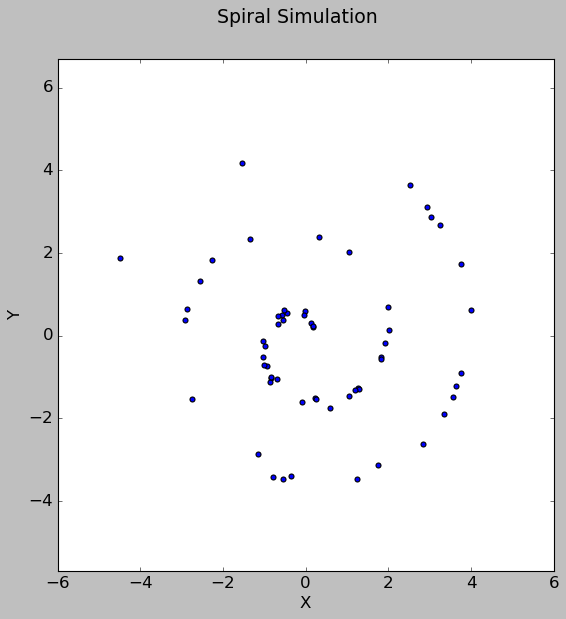

In [86]:
X, Y = sims.spiral_sim(num_samp=60, num_dim=1, noise=0.1)
print(X.reshape(1, -1))
print()
print(Y.reshape(1, -1))
mgc_plot(X, Y, "Spiral", only_viz=True)

**Then let us compute MGC stats for this non-linear data and plot the local correlation maps:**

MGC test statistic: 0.16730139307671343
P Value: 0.002


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


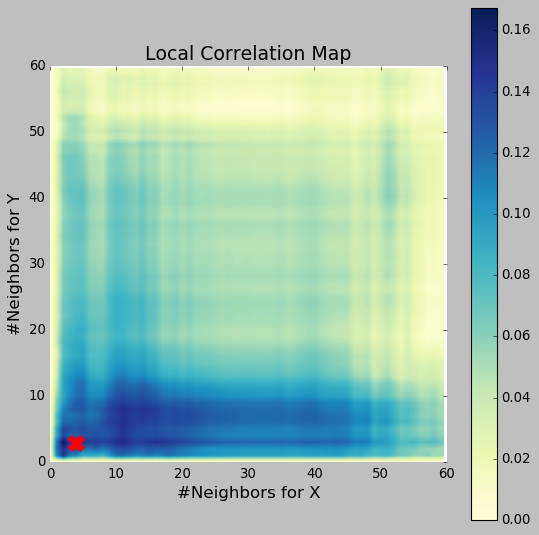

In [87]:
mgc_plot(X, Y, "Spiral", only_mgc=True)

As we can see, the local correlation map plot suggests **a strongly non-linear relationship**. This is because intuitively, having fewer neighbors will help in our identification of the non-linear relationship between x and y, and as we can see in the local correlation map, **the optimal scale [3, 3] is not the global scale, but is local, marked by the red spot on the map.**

# FastMGC
The MGC class is capable of computing the MGC statistics faster in linear time (a bit approximated in some cases), let us see how to use that feature below:

In [3]:
# generate linear data
X, Y = sims.linear_sim(num_samp=60, num_dim=1, noise=0.1)

# create MGC class object
mgc = MGC()

# test statistic
fast_mgc_data={"sub_samples": 10} # fast mgc data preparation
fast_mgc_statistic, test_statistic_metadata = mgc.test_statistic(X, Y, is_fast=True, fast_mgc_data=fast_mgc_data)

# p-value
fast_mgc_data={"sub_samples": 10} # fast mgc data preparation
fast_mgc_p_value, p_value_metadata = mgc.p_value(X, Y, is_fast=True, fast_mgc_data=fast_mgc_data)

# print the results
print("FastMGC test statistic:", fast_mgc_statistic)
print("P Value:", fast_mgc_p_value)
print("Optimal Scale:", test_statistic_metadata["optimal_scale"])

FastMGC test statistic: 0.9751029333883475
P Value: 0.0
Optimal Scale: [60, 60]


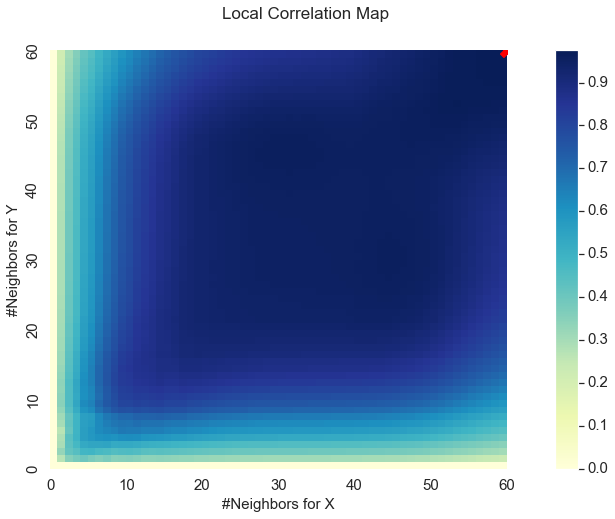

In [4]:
# plot the local correlation map

local_corr = test_statistic_metadata["local_correlation_matrix"]

# define two rows for subplots
fig, (ax, cax) = plt.subplots(ncols=2, figsize=(9.45, 7.5),  gridspec_kw={"width_ratios":[1, 0.05]})

# draw heatmap
fig.suptitle("Local Correlation Map", fontsize=17)
ax = sns.heatmap(local_corr, cmap="YlGnBu", ax=ax, cbar=False)

# colorbar
fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
ax.invert_yaxis()

# optimal scale
optimal_scale = test_statistic_metadata["optimal_scale"]
ax.scatter(optimal_scale[0], optimal_scale[1], marker='X', s=200, color='red') 

# other formatting
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlabel('#Neighbors for X', fontsize=15)
ax.set_ylabel('#Neighbors for Y', fontsize=15) 
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
cax.xaxis.set_tick_params(labelsize=15)
cax.yaxis.set_tick_params(labelsize=15)

plt.show()

# MGC on 20 Different Simulated Data
Now let us run MGC on 20 different simulations with `50 samples` each and `1 D` with `0.1 noise`. **The different simulations we are going to try are:** *circle_sim, cub_sim, exp_sim, joint_sim, linear_sim, log_sim, multi_indep_sim, multi_noise_sim, quad_sim, root_sim, sin_sim, spiral_sim, square_sim, step_sim, two_parab_sim, ubern_sim, w_sim*

In [10]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [11]:
# To run MGC on all 20 simulations

# Import all simulations
from mgcpy.benchmarks.simulations import (circle_sim, cub_sim, exp_sim,
                                          joint_sim, linear_sim, log_sim,
                                          multi_indep_sim, multi_noise_sim,
                                          quad_sim, root_sim, sin_sim,
                                          spiral_sim, square_sim, step_sim,
                                          two_parab_sim, ubern_sim, w_sim)

# Python generator to generate and iterate over all 20 simulations
def generate_simulations():
    NUM_SAMPLES = 50
    NUM_DIMS = 1

    def sin_sim_16(x, y, noise): return sin_sim(x, y, noise, period=16*np.pi)

    def ellipsis_sim(x, y, noise): return circle_sim(x, y, noise, radius=5)

    def square_sim_(x, y, noise): return square_sim(x, y, noise, period=-np.pi/4, indep=True)

    simulations = [linear_sim, exp_sim, cub_sim, joint_sim, step_sim,
                   quad_sim, w_sim, spiral_sim, ubern_sim, log_sim,
                   root_sim, sin_sim, sin_sim_16, square_sim, two_parab_sim,
                   circle_sim, ellipsis_sim, square_sim_, multi_noise_sim, multi_indep_sim]

    for simulation in simulations:
        simulation_name = str(simulation.__name__)
        if simulation_name == "multi_noise_sim" or simulation_name == "multi_indep_sim":
            x, y = simulation(NUM_SAMPLES, NUM_DIMS)
        else:
            x, y = simulation(NUM_SAMPLES, NUM_DIMS, noise=0.1)
        yield x, y, simulation_name

Simulation Name: Linear


<Figure size 432x288 with 0 Axes>

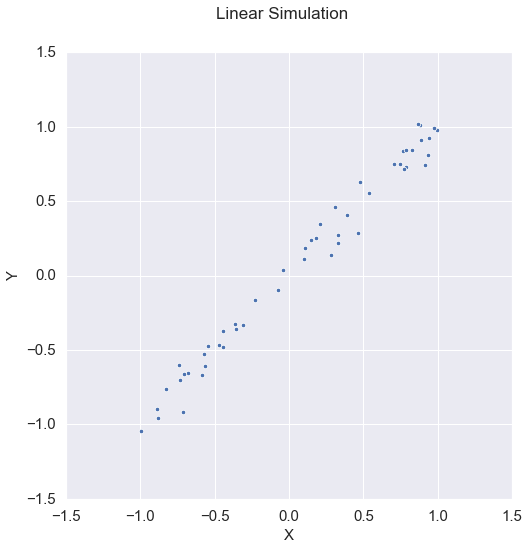

MGC test statistic: 0.9821968044971194
P Value: 0.0
Optimal Scale: [50, 50]


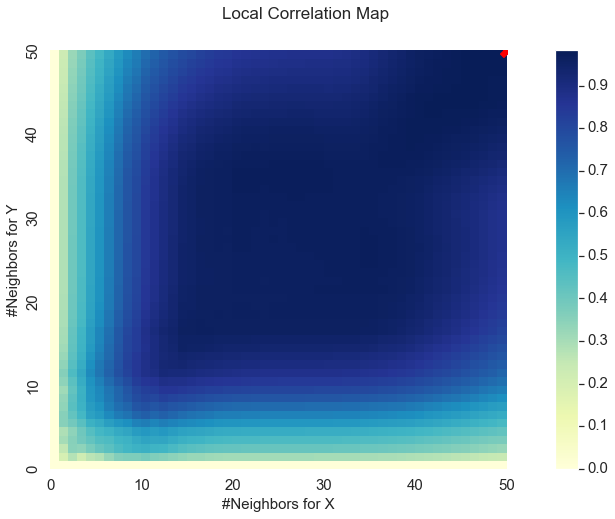

Simulation Name: Exp


<Figure size 432x288 with 0 Axes>

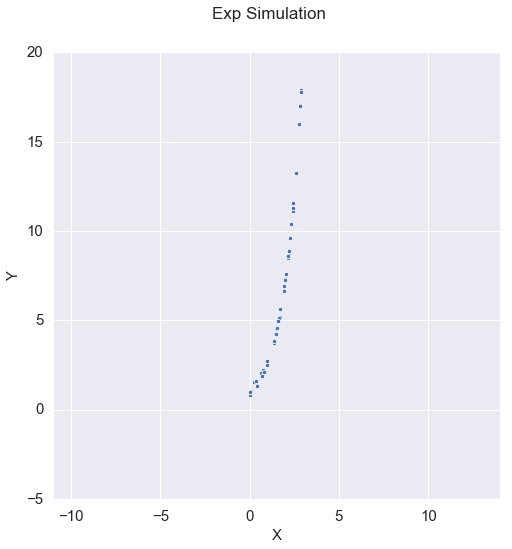

MGC test statistic: 0.9886611630387182
P Value: 0.0
Optimal Scale: [16, 14]


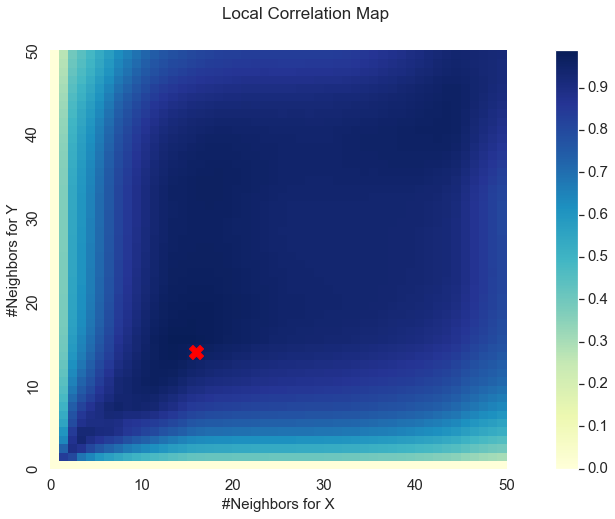

Simulation Name: Cub


<Figure size 432x288 with 0 Axes>

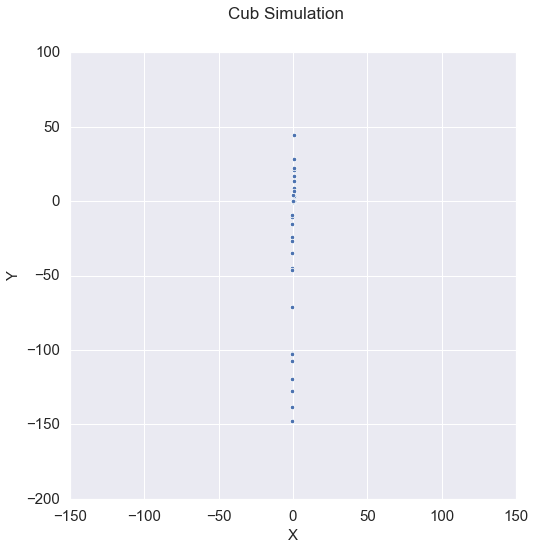

MGC test statistic: 0.8580644913272062
P Value: 0.0
Optimal Scale: [4, 4]


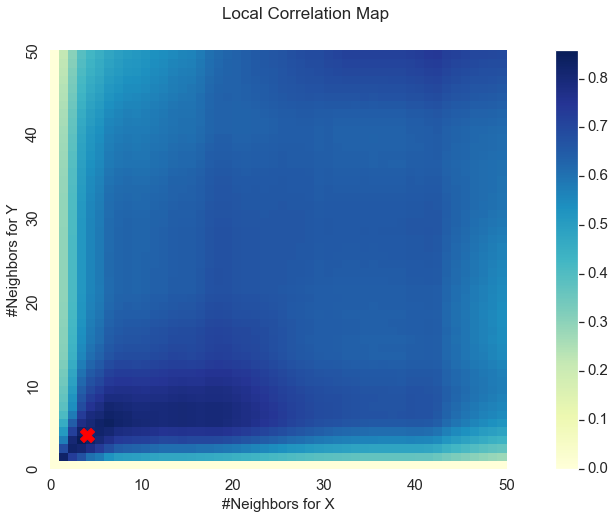

Simulation Name: Joint


<Figure size 432x288 with 0 Axes>

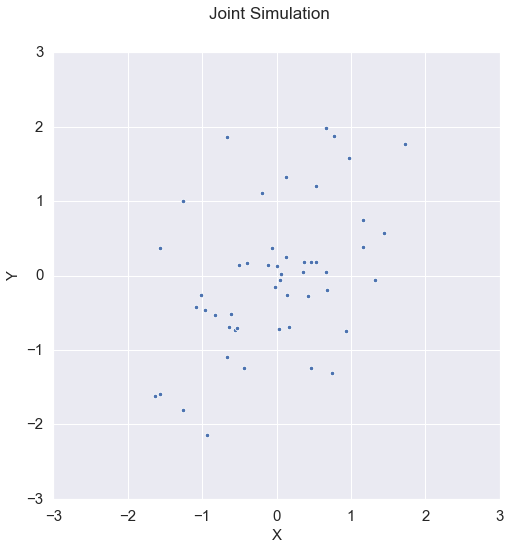

MGC test statistic: 0.14428299949210904
P Value: 0.013000000000000005
Optimal Scale: [50, 50]


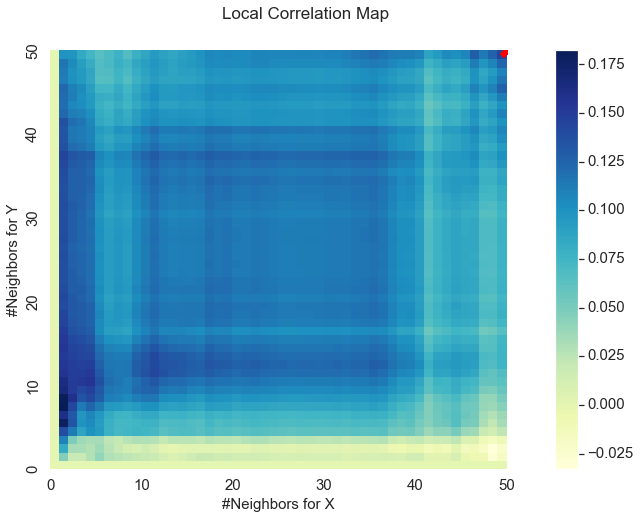

Simulation Name: Step


<Figure size 432x288 with 0 Axes>

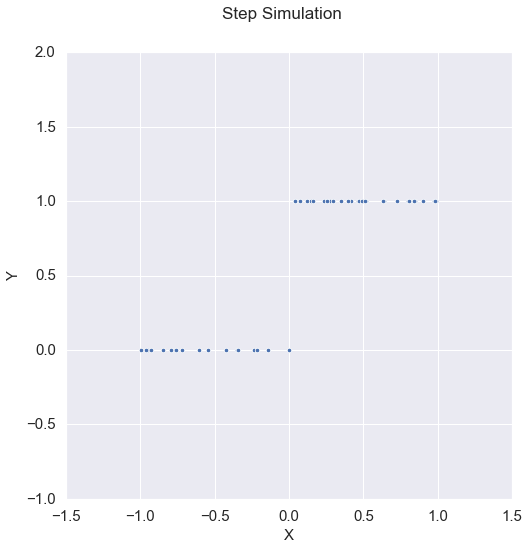

MGC test statistic: 0.7817287429420626
P Value: 0.0
Optimal Scale: [44, 2]


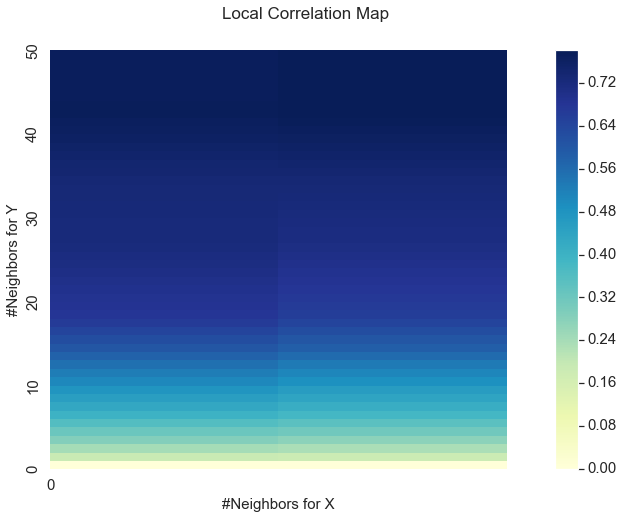

Simulation Name: Quad


<Figure size 432x288 with 0 Axes>

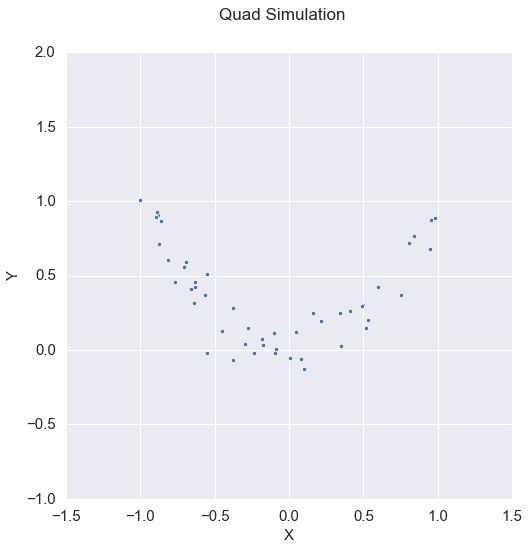

MGC test statistic: 0.4413082857910596
P Value: 0.0
Optimal Scale: [16, 41]


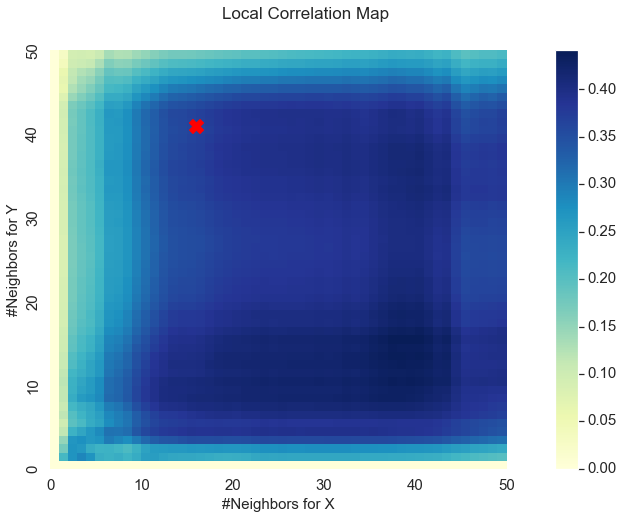

Simulation Name: W


<Figure size 432x288 with 0 Axes>

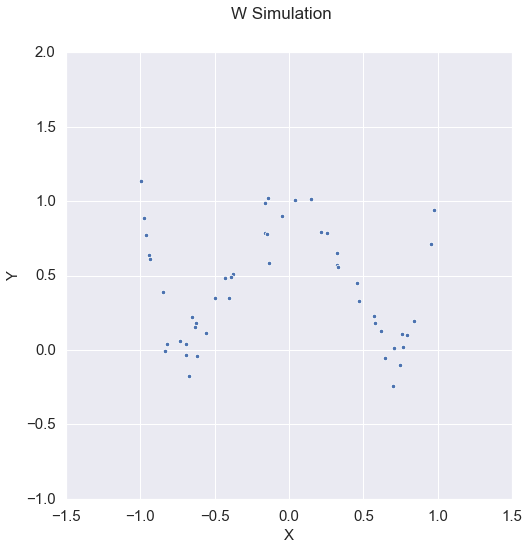

MGC test statistic: 0.33537137121360405
P Value: 0.0
Optimal Scale: [8, 36]


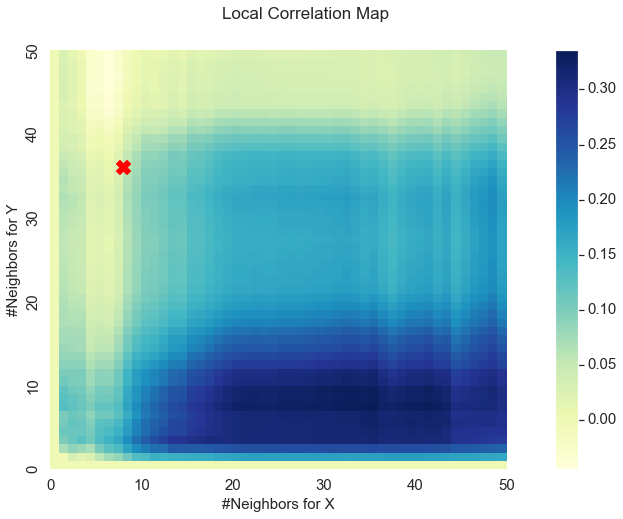

Simulation Name: Spiral


<Figure size 432x288 with 0 Axes>

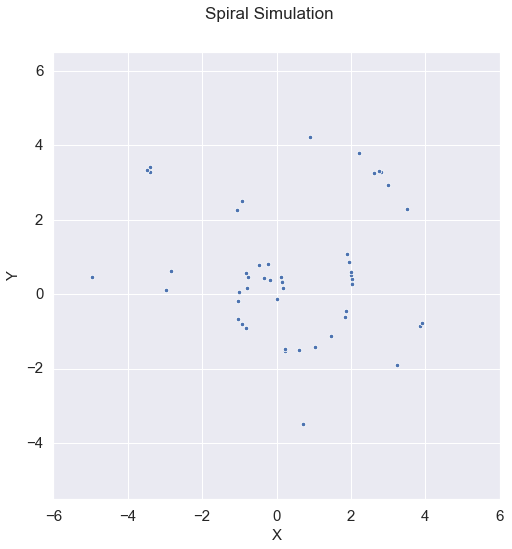

MGC test statistic: 0.2896418490295686
P Value: 0.0
Optimal Scale: [3, 6]


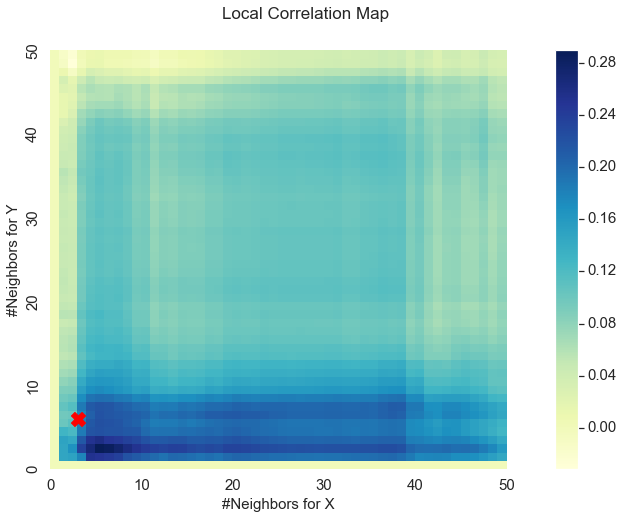

Simulation Name: Ubern


<Figure size 432x288 with 0 Axes>

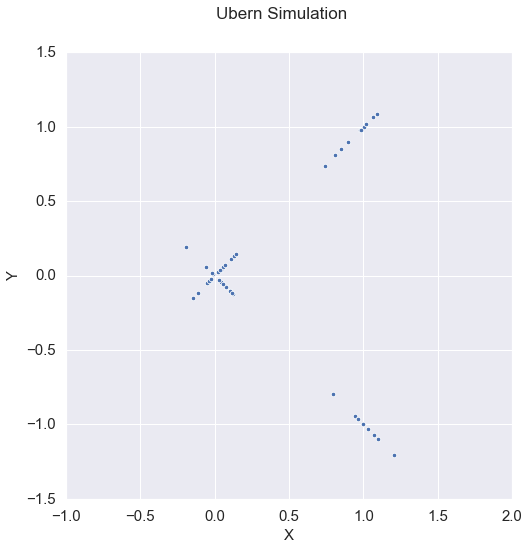

MGC test statistic: 0.8748655106991045
P Value: 0.0
Optimal Scale: [30, 41]


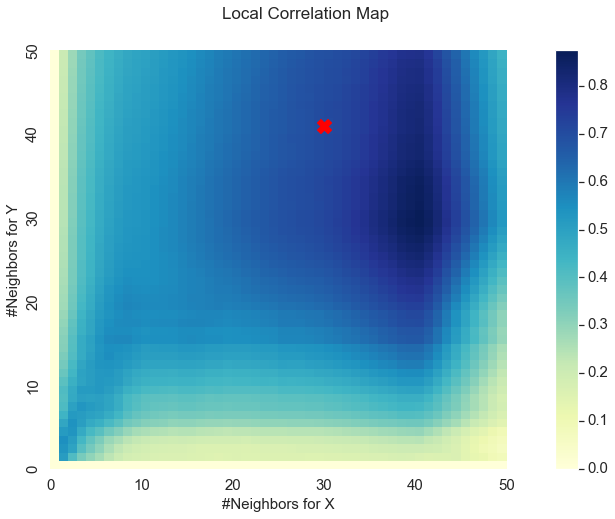

Simulation Name: Log


<Figure size 432x288 with 0 Axes>

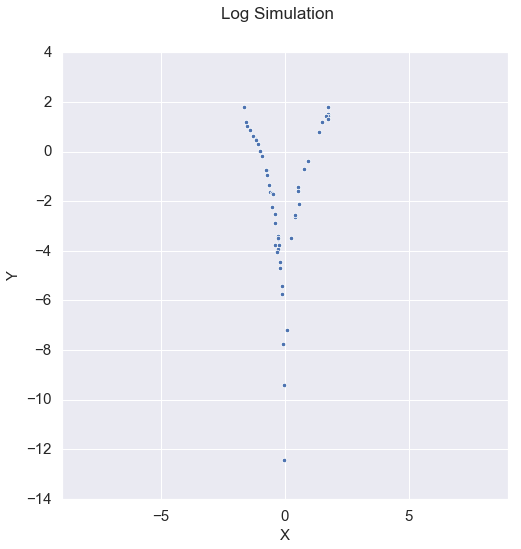

MGC test statistic: 0.6558276598904188
P Value: 0.0
Optimal Scale: [8, 11]


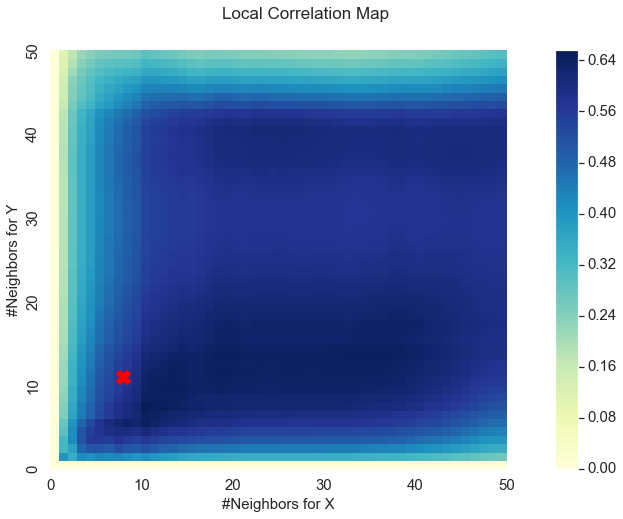

Simulation Name: Root


<Figure size 432x288 with 0 Axes>

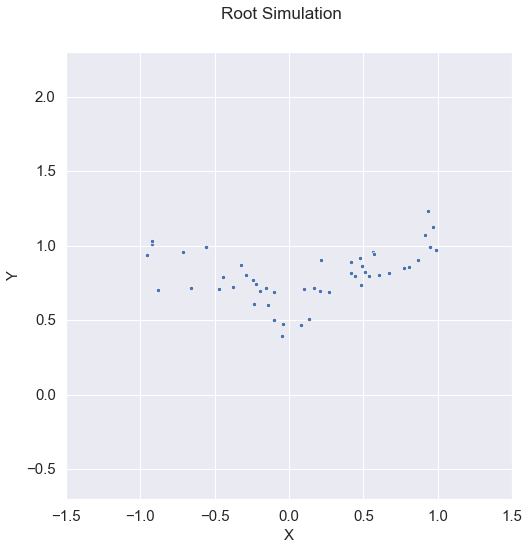

MGC test statistic: 0.3498852164389492
P Value: 0.0
Optimal Scale: [37, 50]


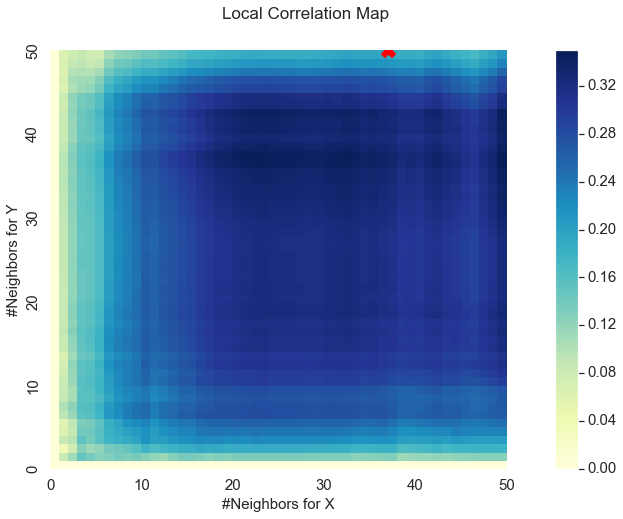

Simulation Name: Sin


<Figure size 432x288 with 0 Axes>

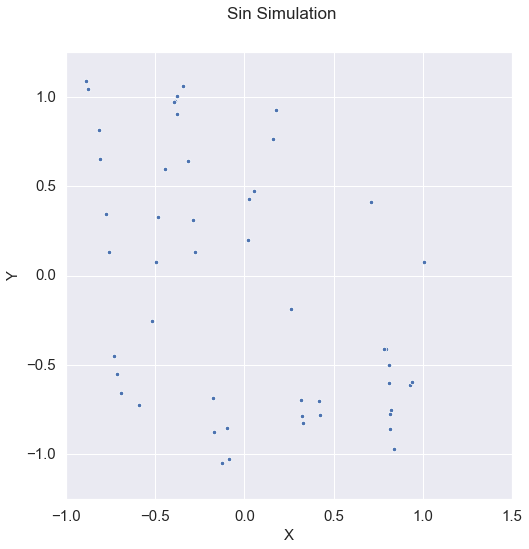

MGC test statistic: 0.30397635918014426
P Value: 0.0
Optimal Scale: [5, 42]


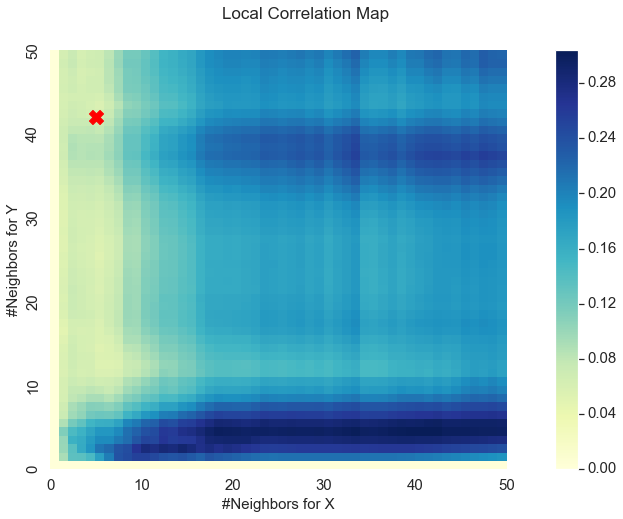

Simulation Name: Sin 16


<Figure size 432x288 with 0 Axes>

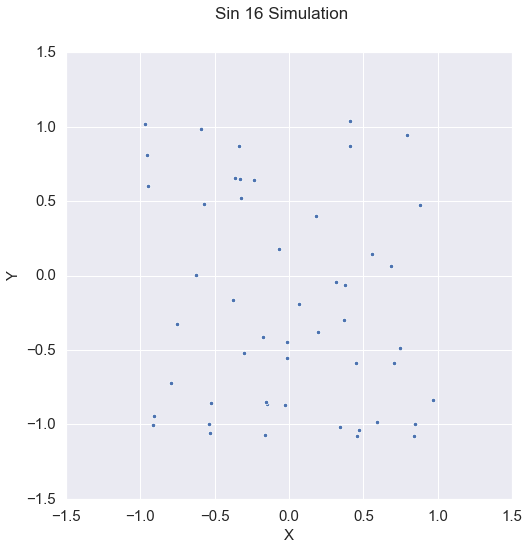

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/mgcpy-0.0.5-py3.6-macosx-10.13-x86_64.egg/mgcpy/independence_tests/abstract_class.py:154: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  "Use results such as test_statistic and optimal_scale, with caution!")


MGC test statistic: -0.007463769877112405
P Value: 0.5010000000000003
Optimal Scale: [50, 50]


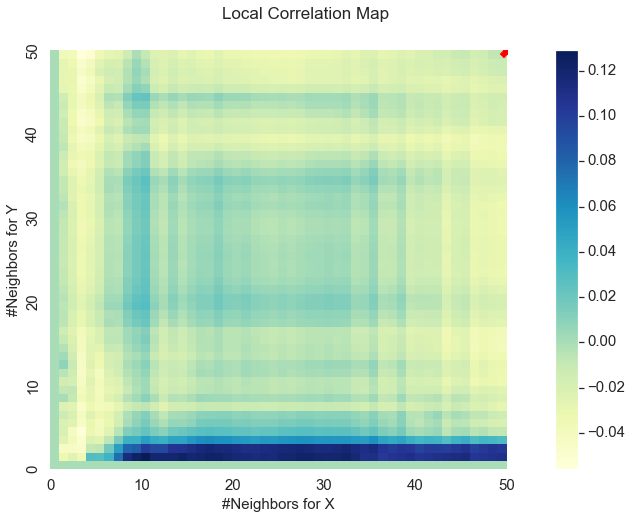

Simulation Name: Square


<Figure size 432x288 with 0 Axes>

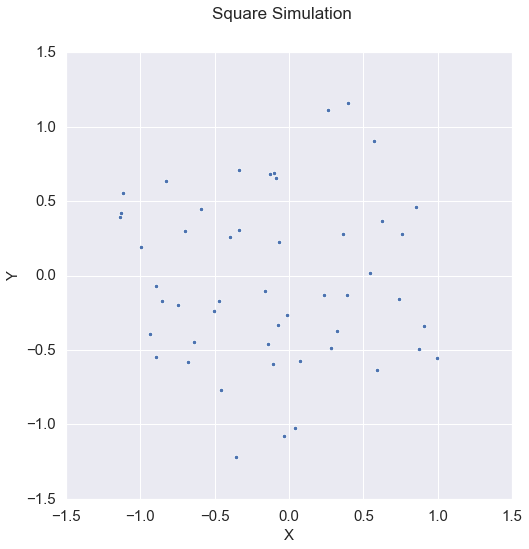

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/mgcpy-0.0.5-py3.6-macosx-10.13-x86_64.egg/mgcpy/independence_tests/abstract_class.py:154: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  "Use results such as test_statistic and optimal_scale, with caution!")


MGC test statistic: -0.019321111286734177
P Value: 0.7270000000000005
Optimal Scale: [50, 50]


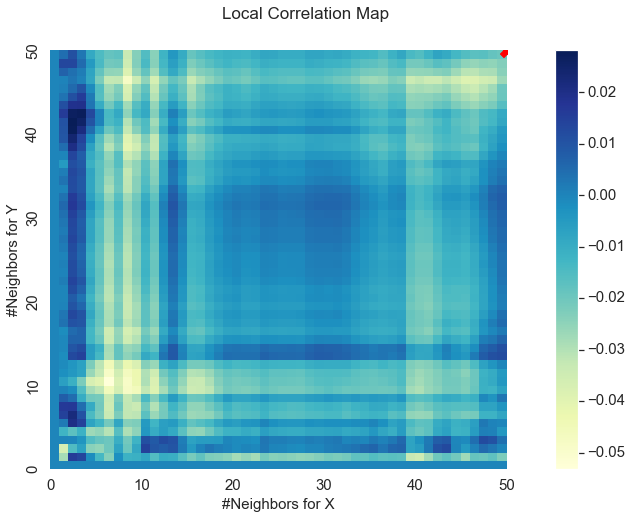

Simulation Name: Two parab


<Figure size 432x288 with 0 Axes>

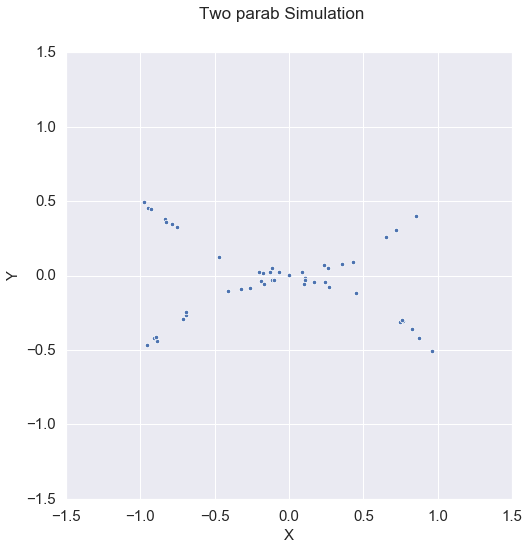

MGC test statistic: 0.4614512842856608
P Value: 0.0
Optimal Scale: [3, 3]


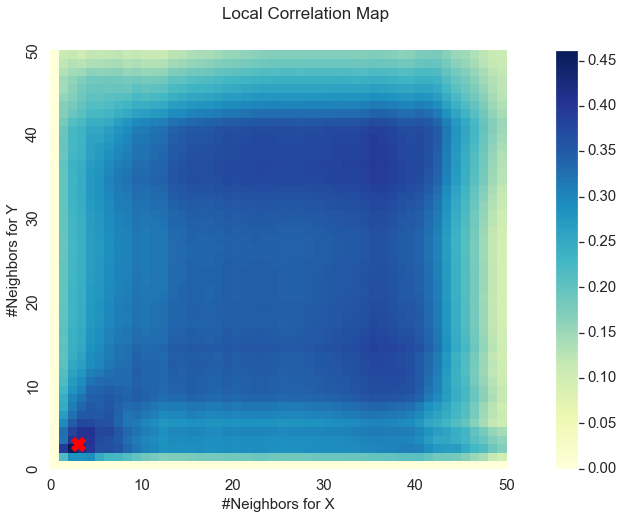

Simulation Name: Circle


<Figure size 432x288 with 0 Axes>

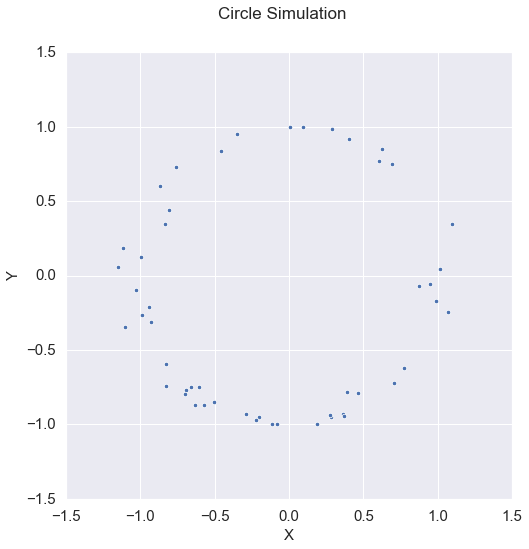

MGC test statistic: 0.25476664776160207
P Value: 0.0
Optimal Scale: [6, 6]


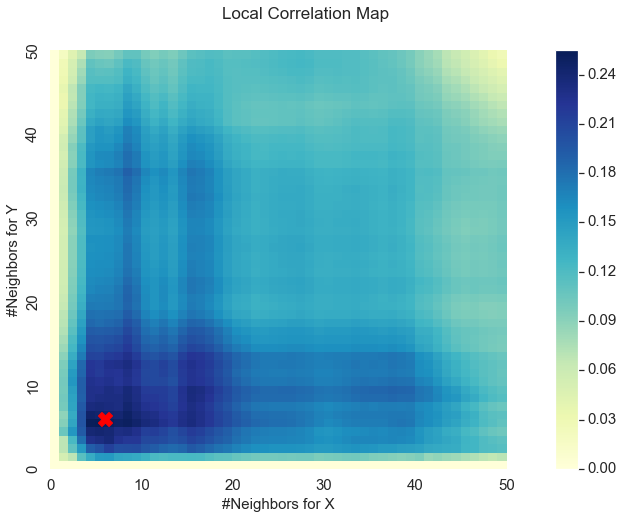

Simulation Name: Ellipsis


<Figure size 432x288 with 0 Axes>

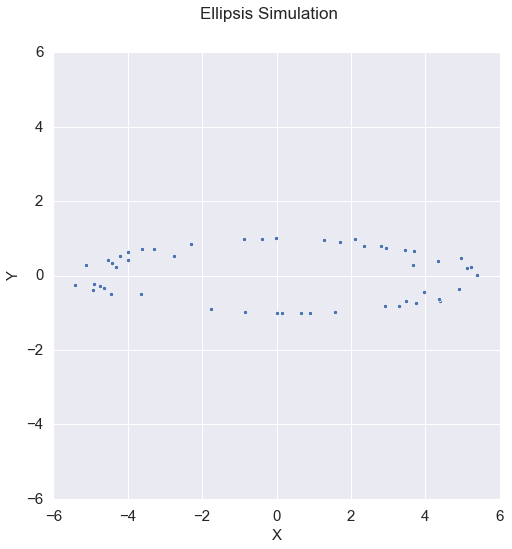

MGC test statistic: 0.2551001522347085
P Value: 0.0
Optimal Scale: [12, 7]


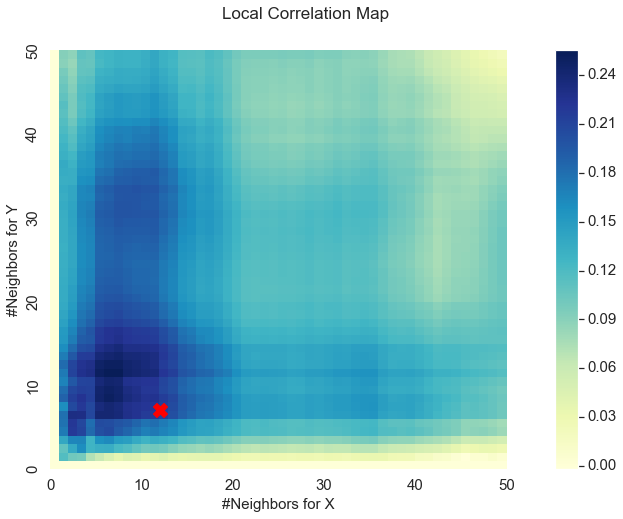

Simulation Name: Square 


<Figure size 432x288 with 0 Axes>

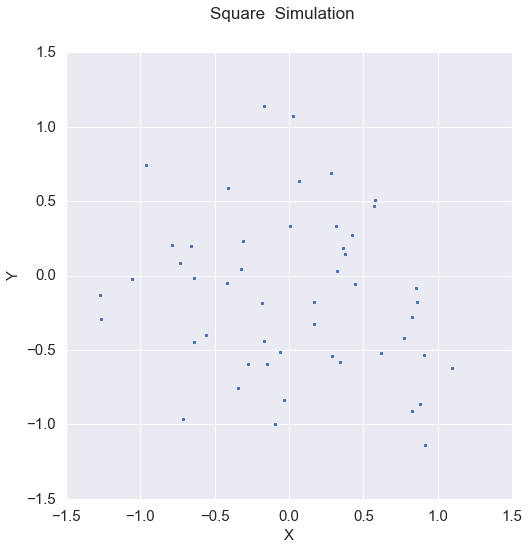

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/mgcpy-0.0.5-py3.6-macosx-10.13-x86_64.egg/mgcpy/independence_tests/abstract_class.py:154: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  "Use results such as test_statistic and optimal_scale, with caution!")


MGC test statistic: 0.01194547363306615
P Value: 0.2450000000000002
Optimal Scale: [50, 50]


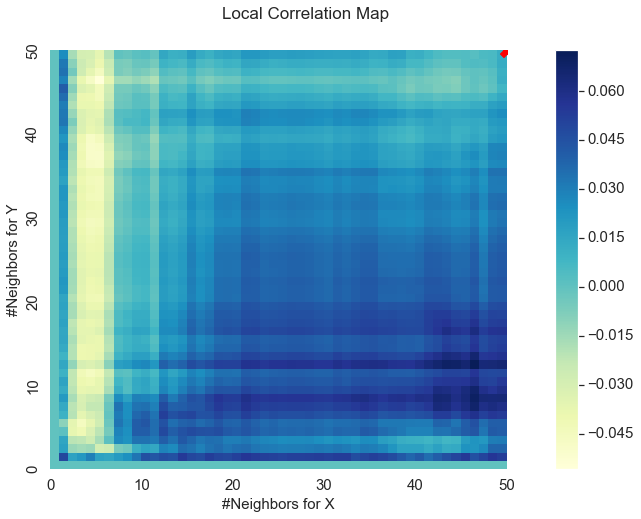

Simulation Name: Multi noise


<Figure size 432x288 with 0 Axes>

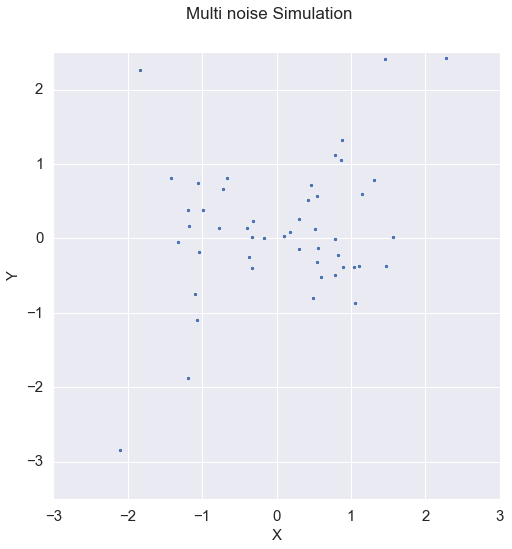

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/mgcpy-0.0.5-py3.6-macosx-10.13-x86_64.egg/mgcpy/independence_tests/abstract_class.py:154: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  "Use results such as test_statistic and optimal_scale, with caution!")


MGC test statistic: 0.036726229343346184
P Value: 0.10800000000000008
Optimal Scale: [50, 50]


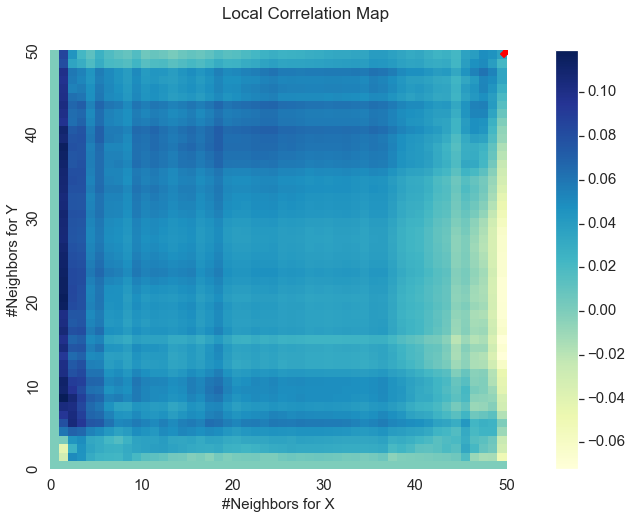

Simulation Name: Multi indep


<Figure size 432x288 with 0 Axes>

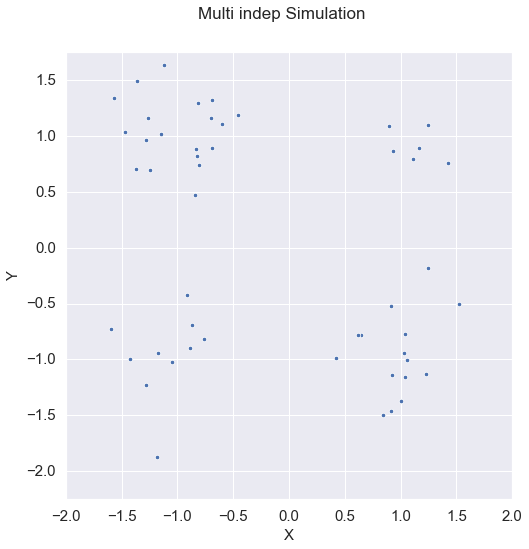

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/mgcpy-0.0.5-py3.6-macosx-10.13-x86_64.egg/mgcpy/independence_tests/abstract_class.py:154: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  "Use results such as test_statistic and optimal_scale, with caution!")


MGC test statistic: 0.07534680654602458
P Value: 0.05500000000000004
Optimal Scale: [50, 50]


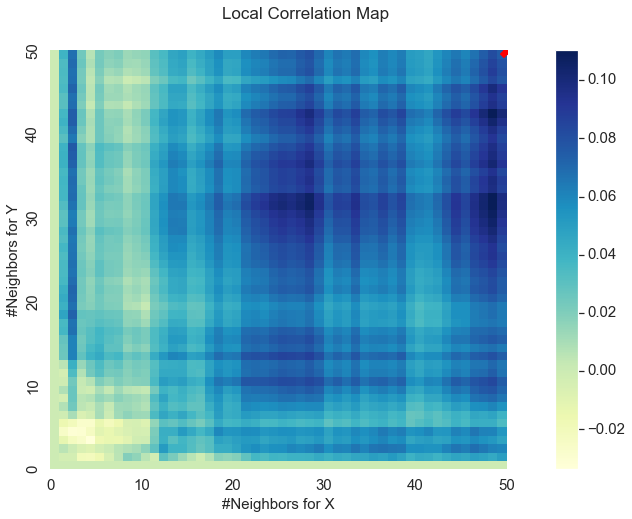

In [12]:
# Plot MGC results of all 20 simulations
for x, y, simulation_name in generate_simulations():
    simulation_name = " ".join(simulation_name.replace("_sim","").split("_")).capitalize()
    print("Simulation Name:", simulation_name)
    mgc_plot(x, y, simulation_name)